### Enquête Besoins en main d'oeuvre 2022

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import sqlalchemy

In [2]:
bmo_2022 = pd.read_csv("Base_open_data_22_def.csv", sep=';', decimal='.')

metiers_info_2022 = pd.read_csv("BMO_Metiers_INFO_2022.csv", sep=';', decimal='.')

pd.set_option('display.max_columns', None)

In [3]:
bmo_2022

,annee,Code métier BMO,Nom métier BMO,Famille_met,Lbl_fam_met,BE22,NOMBE22,Dept,NomDept,REG,NOM_REG,met,xmet,smet
0,2022,A0Z40,Agriculteurs salariés,Z,Autres métiers,101,BASSIN BASSE-TERRE,971,Guadeloupe,1,Guadeloupe,240,149,131
1,2022,A0Z40,Agriculteurs salariés,Z,Autres métiers,102,BASSIN GRANDE-TERRE,971,Guadeloupe,1,Guadeloupe,167,125,146
2,2022,A0Z40,Agriculteurs salariés,Z,Autres métiers,103,BASSIN MARIE-GALANTE,971,Guadeloupe,1,Guadeloupe,16,*,16
3,2022,A0Z40,Agriculteurs salariés,Z,Autres métiers,104,BASSIN ILES DU NORD,971,Guadeloupe,1,Guadeloupe,13,*,13
4,2022,A0Z40,Agriculteurs salariés,Z,Autres métiers,105,BASSIN CENTRE,971,Guadeloupe,1,Guadeloupe,21,21,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50933,2022,W1Z80,Formateurs,S,Fonctions sociales et médico-sociales,9331,EST VAR,83,Var,93,Provence-Alpes-Côte d'Azur,48,23,9
50934,2022,W1Z80,Formateurs,S,Fonctions sociales et médico-sociales,9332,HAUT VAR,83,Var,93,Provence-Alpes-Côte d'Azur,19,15,*
50935,2022,W1Z80,Formateurs,S,Fonctions sociales et médico-sociales,9333,AIX GARDANNE SALON,13,Bouches-du-Rhône,93,Provence-Alpes-Côte d'Azur,202,189,7
50936,2022,W1Z80,Formateurs,S,Fonctions sociales et médico-sociales,9407,AJACCIO,2A,Corse-du-Sud,94,Corse,60,*,*


In [4]:
bmo_2022.describe()

,annee,BE22,REG
count,50938.0,50938.000000,50938.000000
mean,2022.0,5196.922651,51.753229
std,0.0,2732.676550,27.296606
min,2022.0,101.000000,1.000000
25%,2022.0,2805.000000,28.000000
50%,2022.0,5218.000000,52.000000
75%,2022.0,7627.000000,76.000000
max,2022.0,9411.000000,94.000000


In [5]:
print(bmo_2022.dtypes)

annee               int64
Code métier BMO    object
Nom métier BMO     object
Famille_met        object
Lbl_fam_met        object
BE22                int64
NOMBE22            object
Dept               object
NomDept            object
REG                 int64
NOM_REG            object
met                object
xmet               object
smet               object
dtype: object


In [6]:
print(bmo_2022['Nom métier BMO'].unique())

['Agriculteurs salariés' 'Éleveurs salariés'
 'Bûcherons, sylviculteurs salariés et agents forestiers'
 "Conducteurs d'engins agricoles ou forestiers"
 'Maraîchers, horticulteurs salariés' 'Jardiniers salariés'
 'Viticulteurs, arboriculteurs salariés'
 "Techniciens et agents d'encadrement d'exploitations agricoles"
 "Ingénieurs, cadres techniques de l'agriculture"
 'Pêcheurs, aquaculteurs salariés' 'Marins salariés'
 "Cadres et maîtres d'équipage de la marine"
 "Ouvriers non qualifiés des travaux publics, du béton et de l'extraction"
 'Ouvriers non qualifiés du gros œuvre du bâtiment'
 "Ouvriers qualifiés des travaux publics, du béton et de l'extraction"
 'Maçons'
 'Professionnels du travail de la pierre et des matériaux associés'
 'Charpentiers (métal)' 'Charpentiers (bois)' 'Couvreurs'
 'Ouvriers non qualifiés du second œuvre du bâtiment'
 'Plombiers, chauffagistes'
 "Menuisiers et ouvriers de l'agencement et de l'isolation"
 'Électriciens du bâtiment'
 'Ouvriers qualifiés de la pein

# Nom des métiers de notre étude:

'Employés et opérateurs en informatique'
"Techniciens d'étude et de développement en informatique"
 "Techniciens de production, d'exploitation, d'installation, et de maintenance, support et services aux utilisateurs en informatique"
 "Ingénieurs et cadres d'étude, recherche et développement en informatique, chefs de projets informatiques"
 "Ingénieurs et cadres d'administration, maintenance en informatique"
 'Ingénieurs et cadres des télécommunications'


In [7]:
metiers_info = ["Employés et opérateurs en informatique", "Techniciens d'étude et de développement en informatique", "Techniciens de production, d'exploitation, d'installation, et de maintenance, support et services aux utilisateurs en informatique", "Ingénieurs et cadres d'étude, recherche et développement en informatique, chefs de projets informatiques", "Ingénieurs et cadres d'administration, maintenance en informatique", "Ingénieurs et cadres des télécommunications"]

bmo_2022_info = bmo_2022.loc[bmo_2022["Nom métier BMO"].isin(metiers_info)]

bmo_2022_info

#bmo_2022_info.describe()



,annee,Code métier BMO,Nom métier BMO,Famille_met,Lbl_fam_met,BE22,NOMBE22,Dept,NomDept,REG,NOM_REG,met,xmet,smet
28256,2022,M0Z60,Employés et opérateurs en informatique,A,Fonctions administratives,101,BASSIN BASSE-TERRE,971,Guadeloupe,1,Guadeloupe,22,22,6
28257,2022,M0Z60,Employés et opérateurs en informatique,A,Fonctions administratives,102,BASSIN GRANDE-TERRE,971,Guadeloupe,1,Guadeloupe,9,*,*
28258,2022,M0Z60,Employés et opérateurs en informatique,A,Fonctions administratives,104,BASSIN ILES DU NORD,971,Guadeloupe,1,Guadeloupe,*,*,*
28259,2022,M0Z60,Employés et opérateurs en informatique,A,Fonctions administratives,105,BASSIN CENTRE,971,Guadeloupe,1,Guadeloupe,18,18,*
28260,2022,M0Z60,Employés et opérateurs en informatique,A,Fonctions administratives,201,MARTINIQUE CENTRE,972,Martinique,2,Martinique,40,*,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29483,2022,M2Z92,Ingénieurs et cadres des télécommunications,C,Fonctions d'encadrement,9326,LA CASA,06,Alpes-Maritimes,93,Provence-Alpes-Côte d'Azur,17,9,*
29484,2022,M2Z92,Ingénieurs et cadres des télécommunications,C,Fonctions d'encadrement,9331,EST VAR,83,Var,93,Provence-Alpes-Côte d'Azur,*,*,*
29485,2022,M2Z92,Ingénieurs et cadres des télécommunications,C,Fonctions d'encadrement,9332,HAUT VAR,83,Var,93,Provence-Alpes-Côte d'Azur,7,7,*
29486,2022,M2Z92,Ingénieurs et cadres des télécommunications,C,Fonctions d'encadrement,9333,AIX GARDANNE SALON,13,Bouches-du-Rhône,93,Provence-Alpes-Côte d'Azur,82,9,*


In [8]:
metiers_info_2022.sort_values('Difficultés à recruter', axis=0, ascending=False)

,Région,Projets de recrutement,Difficultés à recruter,Emplois saisonniers
15,Corse,70,"85,70%","28,60%"
5,Pays de la Loire,4 640,"78,90%","0,90%"
8,Bretagne,2 320,"75,00%","3,00%"
12,La Réunion,300,"73,30%","0,00%"
6,Nouvelle Aquitaine,3 760,"70,50%","4,00%"
2,Provence-Alpes-Côte d'Azur,6 810,"67,80%","3,80%"
10,Centre-Val de Loire,1 180,"67,80%","0,00%"
1,Auvergne-Rhône-Alpes,8 910,"67,70%","3,50%"
18,Total,76 830,"63,10%","2,70%"
4,Hauts-de-France,5 260,"62,70%","4,40%"


In [9]:
metiers_info_2022_mod = metiers_info_2022.rename(columns={'Région': 'Region','Projets de recrutement': 'Projets_recrutement', 'Difficultés à recruter':'Difficultes_recruter_pourcentage', 'Emplois saisonniers':'Emplois_saisonniers'})



In [10]:
metiers_info_2022_mod.sort_values('Difficultes_recruter_pourcentage', axis=0, ascending=False)

,Region,Projets_recrutement,Difficultes_recruter_pourcentage,Emplois_saisonniers
15,Corse,70,"85,70%","28,60%"
5,Pays de la Loire,4 640,"78,90%","0,90%"
8,Bretagne,2 320,"75,00%","3,00%"
12,La Réunion,300,"73,30%","0,00%"
6,Nouvelle Aquitaine,3 760,"70,50%","4,00%"
2,Provence-Alpes-Côte d'Azur,6 810,"67,80%","3,80%"
10,Centre-Val de Loire,1 180,"67,80%","0,00%"
1,Auvergne-Rhône-Alpes,8 910,"67,70%","3,50%"
18,Total,76 830,"63,10%","2,70%"
4,Hauts-de-France,5 260,"62,70%","4,40%"


In [11]:
metiers_info_2022_mod = metiers_info_2022_mod.replace([",","%"],[".",""],regex=True)

metiers_info = metiers_info_2022_mod[:-1:]

metiers_info

,Region,Projets_recrutement,Difficultes_recruter_pourcentage,Emplois_saisonniers
0,Île-de-France,33 030,57.50,1.90
1,Auvergne-Rhône-Alpes,8 910,67.70,3.50
2,Provence-Alpes-Côte d'Azur,6 810,67.80,3.80
3,Occitanie,5 350,61.90,5.40
4,Hauts-de-France,5 260,62.70,4.40
5,Pays de la Loire,4 640,78.90,0.90
6,Nouvelle Aquitaine,3 760,70.50,4.00
7,Grand Est,2 560,59.80,2.30
8,Bretagne,2 320,75.00,3.00
9,Normandie,1 260,61.90,0.00


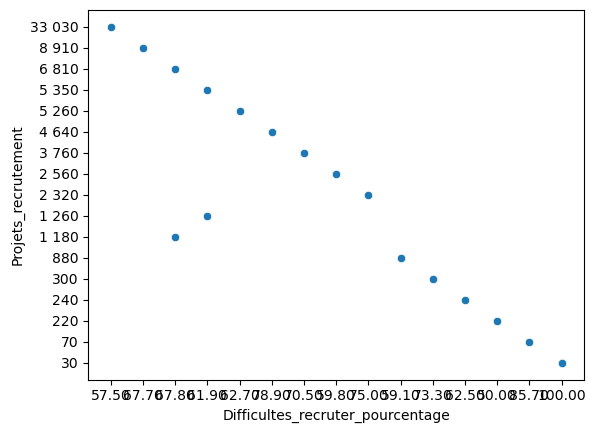

In [12]:
colors = sns.color_palette('pastel')[0:20]
sns.scatterplot(metiers_info, x=metiers_info.Difficultes_recruter_pourcentage, y=metiers_info.Projets_recrutement, sizes=(20, 400), legend="full"
)
plt.show()

## Corrélation: Plus les projets sont nombreux, moins le recrutement est difficile géographiquement.

## Moins il y a de projets informatiques dans une région, plus grandes sont les difficultés de recrutement.


In [13]:
conn = sqlite3.connect('database_emploi')
c = conn.cursor()

In [14]:
c.execute('CREATE TABLE IF NOT EXISTS enquete_bmo (Nom métier BMO)')
conn.commit()

In [15]:
bmo_2022.to_sql('database_emploi', conn, if_exists='replace', index = False)

50938

In [16]:
c.execute('''  
SELECT * FROM database_emploi
          ''')

for row in c.fetchall():
    print (row)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

